# THE CAPSTONE PROJECT DESCRIPTION

**Introduction**

This capstone project from the Google Data Analytics Certificate focuses on the Cyclistic bike-share analysis case study! In this case study, I work for a
fictional company, Cyclistic, along with some key team members. In order to answer the
business questions, I am going to follow the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.  

I am a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share
company in Chicago. The director of marketing believes the company’s future success
depends on maximizing the number of annual memberships. Therefore, my team wants to
understand how casual riders and annual members use Cyclistic bikes differently. From the
insights, my team will design a new marketing strategy to convert casual riders into annual
members. But first, Cyclistic executives must approve my recommendations, so they must 
backed up with compelling data insights and professional data visualizations.

**Characters and teams**

1. **Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, has
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use the bikes to commute to work each day.
2. **Lily Moreno:** The director of marketing and my manager. Moreno is responsible for
the development of campaigns and initiatives to promote the bike-share program.
These may include email, social media, and other channels.
3. **Cyclistic marketing analytics team:** A team of data analysts who are responsible for
collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
I joined this team six months ago and have been busy learning about Cyclistic’s
mission and business goals—as well as how I, as a junior data analyst, can help
Cyclistic achieve them.
4. **Cyclistic executive team:** The notoriously detail-oriented executive team will decide
whether to approve the recommended marketing program.

**About the company**

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
flexibility of its pricing plans: single-ride passes, full-day passes, and annual membership
Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profit
than casual riders. Although the pricing flexibility helps Cyclistic attract more custom
Moreno believes that maximizing the number of annual members will be key to future growth.
Rather than creating a marketing campaign that targets all-new customers, Moreno believes
there is a solid opportunity to convert casual riders into members. She notes that casual riders
are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into
annual members. In order to do that, however, the team needs to better understand how
annual members and casual riders differ, why casual riders would buy a membership, and how
digital media could affect their marketing tactics. Moreno and her team are interested 
analyzing the Cyclistic historical bike trip data to identify trends.

Three questions will guide the future marketing program:

1. How do annual members and casual riders use Cyclistic bikes differently
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Moreno has assigned me the first question to answer: How do annual members and casual
riders use Cyclistic bikes differentl


# STATEMENT OF THE BUSINESS TASK

The business task is **How do annual members and casual riders use Cyclistic bikes differently**

Key stakeholders 

The following are the key stakeholders:
* The director of marketing
* Cyclistic executive team
* Cyclistic marketing analytics team

# DESCRIPTION OF ALL DATA SOURCES USED

Data has been downloaded from the company’s website via this link https://divvy-tripdata.s3.amazonaws.com/index.html.

The recorded data is composed of datasets for trips from years 2013 to 2024, and the various stations names.

For the purpose of this project, only the data from **2019**, quarters **Q1, Q3, Q4** and **Q1** from **2020** have been considered for the analysis.

Each quarter is a dataset of records of trips, organised in a table of columns and rows. The following columns composed the tables:
* Trip_id which is the identifier for each trip
* Start_time: the time the trip starts
* End_time: the time the trips ends
* From_station_name: the name of the station where the trip starts
* To_station_name: the destination station where the trip ends
* Ids for each station
* Geographic coordinates of stations
* The type of user using the bike
* The birth year and gender of the user.
Again, for this project, the data on location, birth, gender have been dropped.


# DOCUMENTATION OF CLEANING OR MANIPULATION OF DATA 

Here is how we will proceed to the cleaning and manipulation of data

1.	After the datasets were loaded, we proceeded to the renaming of columns to make them consistent. Datasets from 2020 have light changes in the naming of columns.
2.	Convert data types
Convert trip_id and bikeid from 2019 to character so that they can stack correctly with that from 2020.
3.	Stack individual quarter's data frames into one big data frame. Q1, Q3, Q4 from 2019 and Q1 from 2020 have been stacked into one single dataframe.
4.	Remove unnecessary fields. Lat, long, birthyear, and gender and trip_duratin fields removed from 2019 as this data was dropped beginning in 2020. 
5.	Change the types of user fr alignment. Subscriber into member, Customer to casual
6.	Added more fields for Date, Month, Day, Day_of_week and ride_length (difference between the end_time of trip and the start_time, in seconds)
7.	Remove "bad" data. The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
8.	Created a new version of the dataframe (v2) since data was removed


## Collection of data

### Upload of datasets (csv files)

But before that we ready our working environment by loading yhe necessary libraries

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(dplyr)
library(knitr)
# Use the conflicted package to manage conflicts
library(conflicted)

# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[conflicted] Will prefer dplyr::filter over any other package.


[conflicted] Will prefer dplyr::lag over any other package.


Now we upload our csv files containing the various datasets

In [2]:
q1_2019 <- read.csv("/kaggle/input/divvy-trips-2019-q1/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read.csv("/kaggle/input/divvy-trips-2020-q1/Divvy_Trips_2020_Q1.csv")
q3_2019 <- read.csv("/kaggle/input/divvy-trips-2019-q3/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read.csv("/kaggle/input/divvy-trips-2019-q4/Divvy_Trips_2019_Q4.csv")

Let's take a look at our datasets and see how they look like

In [3]:
View(q1_2019)
View(q1_2020)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member
31EB9B8F406D4C82,docked_bike,2020-01-10 13:07:35,2020-01-10 13:12:24,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
A2B24E3F9C9720E3,docked_bike,2020-01-10 07:24:53,2020-01-10 07:29:50,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
5E3F01E1441730B7,docked_bike,2020-01-31 16:37:16,2020-01-31 16:42:11,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


## Wrangling data and combining into a single dataset

### Compare column names for each of the files
While the names don't have to be in the same order, they DO need to match perfectly before we can join them together

In [4]:
colnames(q1_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

### Renaming columns

After the datasets were loaded, we proceeded to the renaming of columns to make them consistent. Datasets from 2020 have light changes in the naming of columns.

In [5]:
(q1_2020 <- rename(q1_2020,
                  trip_id = ride_id,
                  bikeid = rideable_type,
                   start_time = started_at,
                   end_time = ended_at,
                   from_station_name = start_station_name,
                   from_station_id = start_station_id,
                   to_station_name = end_station_name,
                   to_station_id = end_station_id,
                   usertype = member_casual
                   ))

trip_id,bikeid,start_time,end_time,from_station_name,from_station_id,to_station_name,to_station_id,start_lat,start_lng,end_lat,end_lng,usertype
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member
31EB9B8F406D4C82,docked_bike,2020-01-10 13:07:35,2020-01-10 13:12:24,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
A2B24E3F9C9720E3,docked_bike,2020-01-10 07:24:53,2020-01-10 07:29:50,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member
5E3F01E1441730B7,docked_bike,2020-01-31 16:37:16,2020-01-31 16:42:11,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


### Convert data types

Convert **trip_id** and **bikeid** from **2019** to character so that they can stack correctly with that from **2020**.

In [6]:
# 2019 quarters trip_id into character
q1_2019$trip_id <- as.character(q1_2019$trip_id)
q3_2019$trip_id <- as.character(q3_2019$trip_id)
q4_2019$trip_id <- as.character(q4_2019$trip_id)

# 2019 quarters bikeid into character
q1_2019$bikeid <- as.character(q1_2019$bikeid)
q3_2019$bikeid <- as.character(q3_2019$bikeid)
q4_2019$bikeid <- as.character(q4_2019$bikeid)

### Stack individual quarter's data frames into one big data frame

Stack individual quarter's data frames into one big data frame. Q1, Q3, Q4 from 2019 and Q1 from 2020 have been stacked into one single dataframe.

In [7]:
#all_trips <- bind_rows(q1_2019, q1_2020)#, q3_2019)#, q4_2019, q1_2020)
all_trips <- bind_rows(q1_2019, q3_2019, q4_2019, q1_2020)

Let's take a look at the stacked dataset

In [8]:
View(all_trips)

trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,start_lat,start_lng,end_lat,end_lng
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,NA,NA,NA,NA
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,NA,NA,NA,NA
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,NA,NA,NA,NA
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,NA,NA,NA,NA
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,NA,NA,NA,NA
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983,NA,NA,NA,NA
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984,NA,NA,NA,NA
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990,NA,NA,NA,NA
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995,NA,NA,NA,NA


### Remove unnecessary fields

Remove unnecessary fields. Lat, long, birthyear, and gender and trip_duratin fields removed from 2019 as this data was dropped beginning in 2020. 

In [9]:
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

## Clean up and add data to prepare for analysis

Inspect the new table that has been created
Inspect to check if there are any irregilarities

In [10]:
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

[1] "trip_id"           "start_time"        "end_time"         
[4] "bikeid"            "from_station_id"   "from_station_name"
[7] "to_station_id"     "to_station_name"   "usertype"

[1] 3136728

[1] 3136728       9

,trip_id,start_time,end_time,bikeid,from_station_id,from_station_name,to_station_id,to_station_name,usertype
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
2,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
3,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
4,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
5,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
6,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


'data.frame':	3136728 obs. of  9 variables:
 $ trip_id          : chr  "21742443" "21742444" "21742445" "21742446" ...
 $ start_time       : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ end_time         : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ bikeid           : chr  "2167" "4386" "1524" "252" ...
 $ from_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype         : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   trip_id           start_time          end_time            bikeid         
 Length:3136728     Length:3136728     Length:3136728     Length:3136728    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 from_station_id from_station_name  to_station_id to_station_name   
 Min.   :  2.0   Length:3136728     Min.   :  2   Length:3136728    
 1st Qu.: 77.0   Class :character   1st Qu.: 77   Class :character  
 Median :174.0   Mode  :character   Median :174   Mode  :character  
 Mean   :203.3                      Mean   :204                     
 3rd Qu.:290.0                      3rd

Change the types of usertype, add more columns for date, year, etc, recalculate the trip duration

In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). We will need to consolidate that from four to two labels.

In [11]:
# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
all_trips <- all_trips %>%
  mutate(usertype = recode(usertype,
                           "Subscriber"="member",
                           "Customer"="casual"))

table(all_trips$usertype)


 casual  member 
 669531 2467197 

### Add columns that list the date, month, day, and year of each ride

This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level
Added more fields for **Date**, **Month**, **Day**, **Day_of_week** and **ride_length** (difference between the **end_time** of trip and the **start_time**, in seconds)

https://www.statmethods.net/input/dates.html more on date formats in R found at that link

In [12]:
all_trips$date <- as.Date(all_trips$start_time) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

### Add a column for tripduration

Add "ride_length" column for calculation to all_trips (in minutes)

https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html

In [13]:
all_trips$ride_length <- difftime(all_trips$end_time, all_trips$start_time, units = "min")

str(all_trips)

'data.frame':	3136728 obs. of  15 variables:
 $ trip_id          : chr  "21742443" "21742444" "21742445" "21742446" ...
 $ start_time       : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ end_time         : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ bikeid           : chr  "2167" "4386" "1524" "252" ...
 $ from_station_id  : int  199 44 15 123 173 98 98 211 150 268 ...
 $ from_station_name: chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ to_station_id    : int  84 624 644 176 35 49 49 142 148 141 ...
 $ to_station_name  : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ usertype         : chr  "member" "member" "member" "member" ...
 $ date             : Date, format: "2019-01-01" "2019-01-01" ...
 $ month            : chr  "01" "01"


### Remove "bad" data

The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative.

We will create a new version of the dataframe (v2) since data is being removed.

https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/

In [14]:
all_trips_v2 <- all_trips[!(all_trips$from_station_name == "HQ QR" | all_trips$ride_length<0),]

# DESCRIPTIVE ANALYSIS AND VISUALIZATION

### Descriptive analysis on ride_length (all figures in minutes)

In [15]:
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

summary(all_trips_v2$ride_length)

Time difference of 24.64899 mins

Time difference of 11.25 mins

Time difference of 177200.4 mins

Time difference of 0.01666667 mins

  Length    Class     Mode 
 3132948 difftime  numeric 

### Compare annual members and casual riders

Annual members and casual riders average ride_length, max, min and median

In [16]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype, FUN = min)

all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<drtn>
casual,63.47811 mins
member,14.17114 mins


all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<drtn>
casual,25.03333 mins
member,9.50000 mins


all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<drtn>
casual,177200.4 mins
member,150943.9 mins


all_trips_v2$usertype,all_trips_v2$ride_length
<chr>,<drtn>
casual,0.03333333 mins
member,0.01666667 mins


We could see that casual riders have spent more time on rides than the annual members, an average of **63 mins** against **14 mins**

### See the average ride time by each day for annual members vs casual riders

In [17]:
# Notice that the days of the week are out of order. Let's fix that
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

aggregate(all_trips_v2$ride_length ~ all_trips_v2$usertype + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$usertype,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<drtn>
casual,Sunday,63.86667 mins
member,Sunday,15.36281 mins
casual,Monday,60.14245 mins
member,Monday,14.12533 mins
casual,Tuesday,63.56750 mins
member,Tuesday,14.01480 mins
casual,Wednesday,66.26376 mins
member,Wednesday,13.48182 mins
casual,Thursday,67.95063 mins


Over the week, casual riders have the highest time spent on **Fridays**, **69.13 mins** and spent less time on **Sarurdays**, **57.7 mins**. On the other hand, annual members have spent their highest time on **Saturdays**, **16.57 mins** and their lowest time on **Thursdays**, **13.75 mins**

### Analyze ridership data by type and weekday

In [18]:
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(usertype, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()	#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(usertype, weekday)	# sorts

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


usertype,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<drtn>
casual,Sun,129727,63.86667 mins
casual,Mon,77611,60.14245 mins
casual,Tue,67672,63.56750 mins
casual,Wed,70045,66.26376 mins
casual,Thu,80828,67.95063 mins
casual,Fri,89171,69.13647 mins
casual,Sat,150705,57.77983 mins
member,Sun,216548,15.36281 mins
member,Mon,391837,14.12533 mins


Here we can see that annual members have more number of rides than the casual riders, and this all over the week

### Overall total number of rides by user type

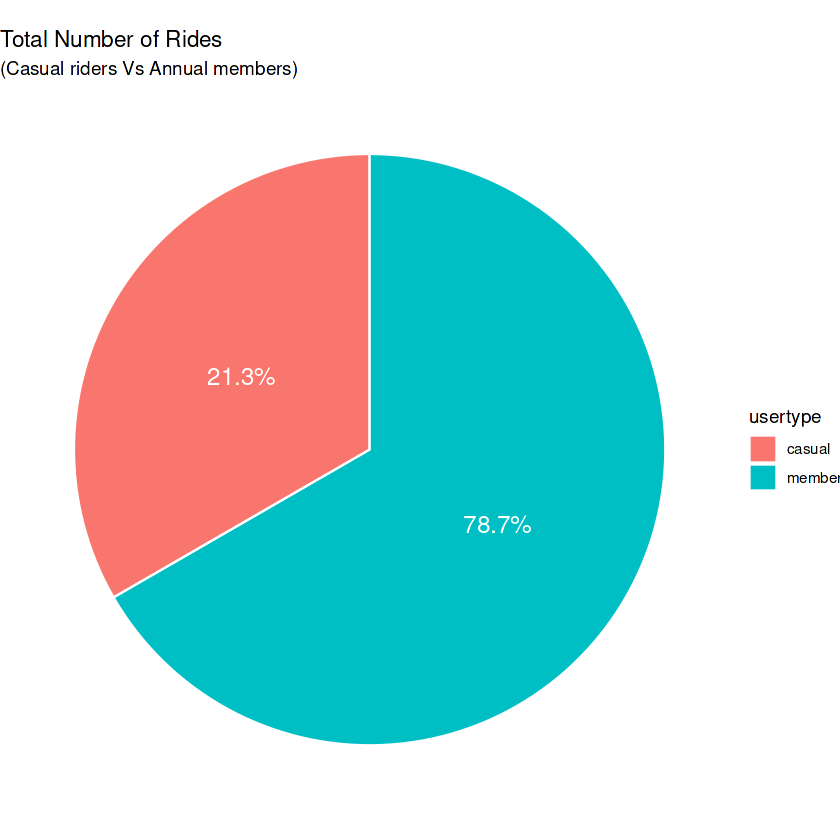

In [19]:
all_trips_v2 %>% group_by(usertype) %>% summarise(numer_of_ride = n()) %>% ggplot(aes(x = "", y = usertype, fill = usertype)) +
  geom_bar(stat = "identity", width = 1, color = "white") +  # Create a bar chart
  coord_polar("y", start = 0) + # Convert to pie chart
  geom_text(aes(label = paste0(round(numer_of_ride / sum(numer_of_ride) * 100, 1), "%")), # Add percentage labels
            position = position_stack(vjust = 0.5), # Center the labels
            color = "white", size = 5) +  # Adjust label color and size
  labs(title = "Total Number of Rides", subtitle = "(Casual riders Vs Annual members)") +
  theme_void()  # Remove axes for a clean pie chart

**78%** of rides are by the annual members against **21%** for casual riders

### Now the number of rides over the week by user type

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


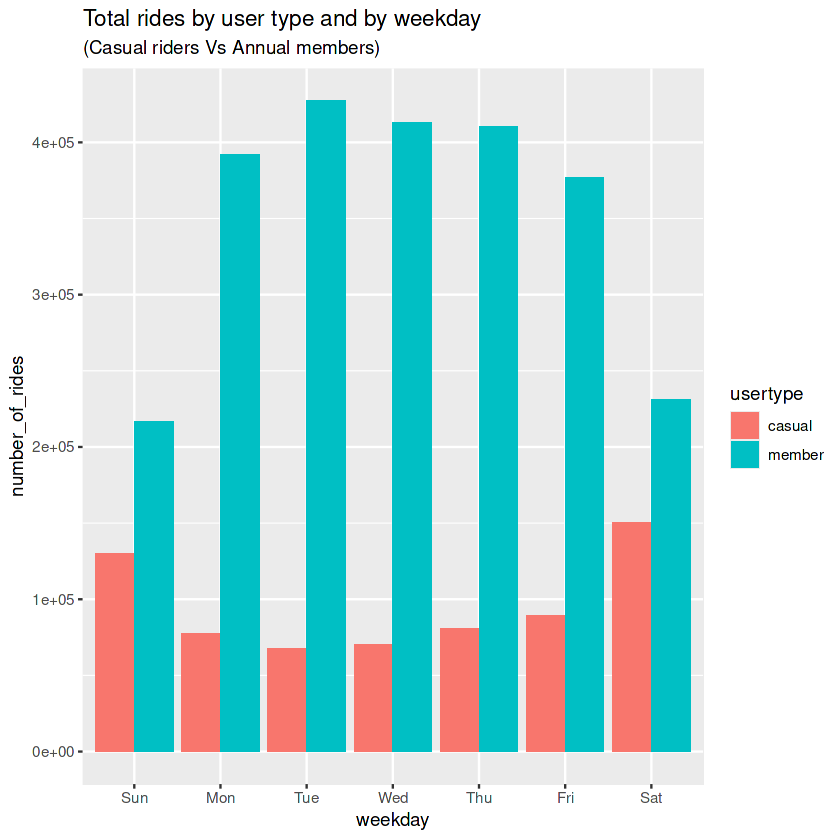

In [20]:
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   
  group_by(usertype, weekday) %>%   
  summarise(number_of_rides = n()	 
            ,average_duration = mean(ride_length)) %>% 		 
  arrange(usertype, weekday) %>%
ggplot(aes(x = weekday, y = number_of_rides, fill = usertype)) +
geom_col(position = "dodge") +
labs(title = "Total rides by user type and by weekday", subtitle = "(Casual riders Vs Annual members)")

### Overall time spent on rides by user type

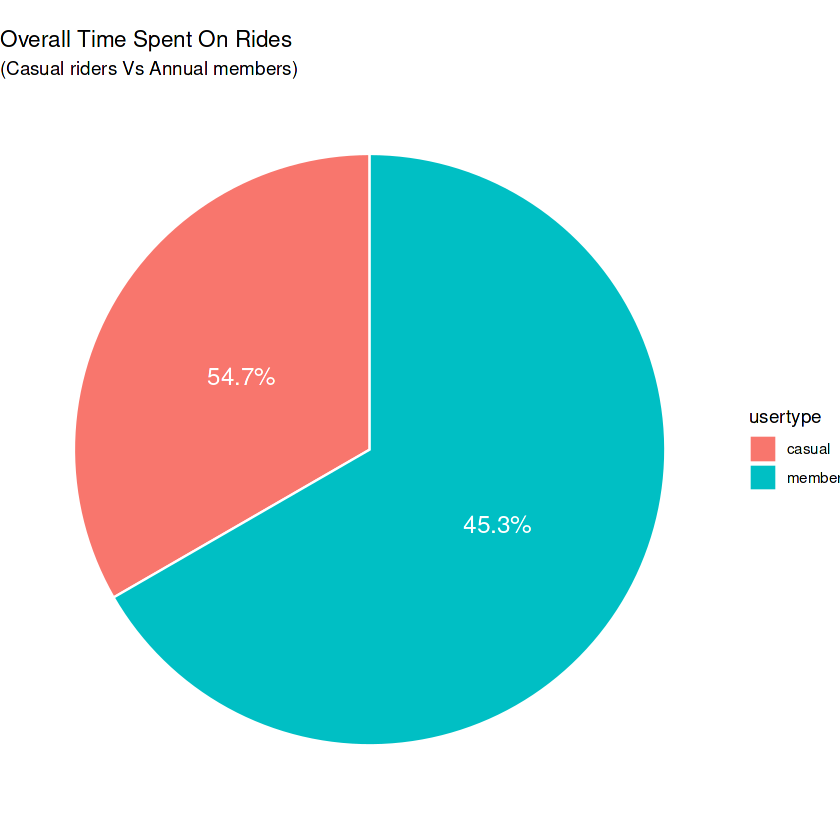

In [21]:
all_trips_v2 %>% group_by(usertype) %>% summarise(length_of_ride = sum(ride_length)) %>% ggplot(aes(x = "", y = usertype, fill = usertype)) +
  geom_bar(stat = "identity", width = 1, color = "white") +  # Create a bar chart
  coord_polar("y", start = 0) + # Convert to pie chart
  geom_text(aes(label = paste0(round(as.numeric(length_of_ride) / sum(as.numeric(length_of_ride)) * 100, 1), "%")), # Add percentage labels
            position = position_stack(vjust = 0.5), # Center the labels
            color = "white", size = 5) +  # Adjust label color and size
  labs(title = "Overall Time Spent On Rides", subtitle = "(Casual riders Vs Annual members)") +
  theme_void()  # Remove axes for a clean pie chart

**54.7%** of the time spent on the rides are by the casual riders, **45.3%** are by the annual members

### The time spent over the week

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


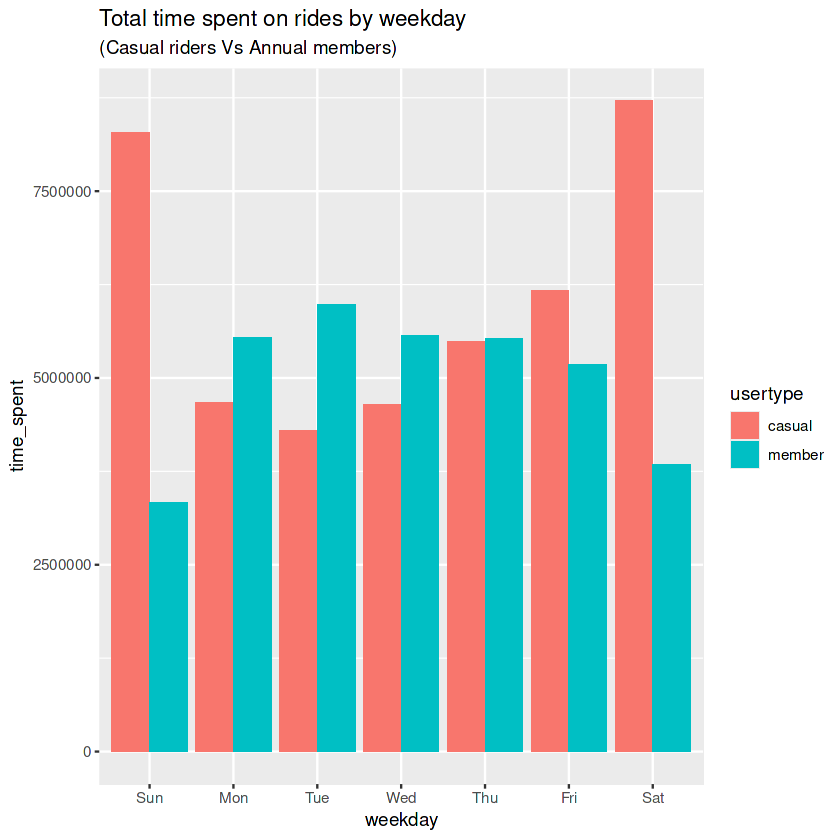

In [22]:
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   
  group_by(usertype, weekday) %>%
  summarise(number_of_rides = n()	 
            ,time_spent = sum(ride_length)) %>% 
  arrange(usertype, weekday) %>%
ggplot(aes(x = weekday, y = time_spent, fill = usertype)) +
geom_col(position = "dodge") +
labs(title = "Total time spent on rides by weekday",
        subtitle = "(Casual riders Vs Annual members)")

Overall in the week, Casual riders spent more time on rides than the annual members except on **Mondays**, **Tuesdays** and **wednesdays**.

### Let's see the average duration over the week by user type

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


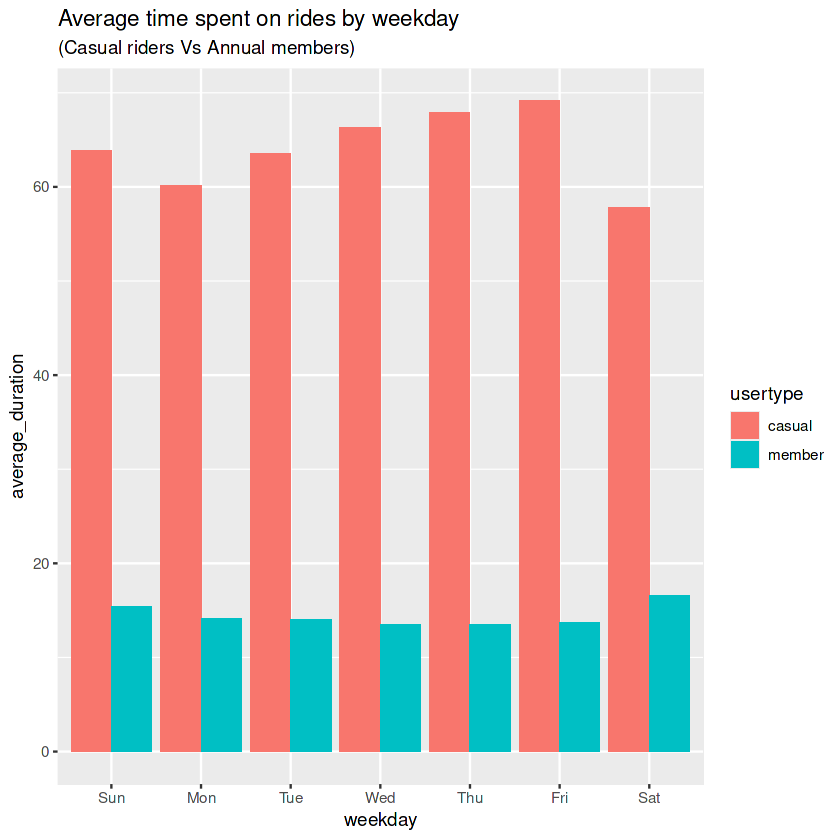

In [23]:
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   
  group_by(usertype, weekday) %>%   
  summarise(number_of_rides = n()	 
            ,average_duration = mean(ride_length)) %>% 		 
  arrange(usertype, weekday) %>%
  ggplot(aes(x = weekday, y = average_duration, fill = usertype)) +
geom_col(position = "dodge") +
labs(title = "Average time spent on rides by weekday",
    subtitle = "(Casual riders Vs Annual members)")

In average over the week, casual riders have more time spent than the annual members

### Calculate the costs of rides on classic and electric bikes
Let's calculate to see how much casual riders spent over a week, month and year and by type of bike

In [24]:
#Single and day pass rides costs in dollars on classic and electric bikes

# Ensure 'start_time' is a proper date-time object
all_trips_v2 <- all_trips_v2 %>%
  mutate(start_time = as.POSIXct(start_time))

# Ensure ride_length is numeric
all_trips_v2 <- all_trips_v2 %>%
  mutate(ride_length = as.numeric(ride_length))

# Create the aggregated data
aggreg_data <- all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   # Add weekday column
  group_by(usertype, weekday) %>%   # Group by usertype and weekday
  summarise(
    avg_ride_length = mean(ride_length, na.rm = TRUE),  # Average ride length
    avg_cost_cb = mean(ride_length, na.rm = TRUE) * 0.18,  # Single ride cost
    avg_cost_eb = mean(ride_length, na.rm = TRUE) * 0.44  # Day pass cost
  ) %>% 		 
  arrange(usertype, weekday) %>%  # Arrange by usertype and weekday
  pivot_wider(
    names_from = usertype,  # Spread by usertype
    values_from = c(avg_ride_length, avg_cost_cb, avg_cost_eb),
    names_sep = "_"
  )

# Rename columns for clarity
colnames(aggreg_data) <- c("Weekday", 
                          "Avg_Ride_Length_Casual", "Avg_Ride_Length_Member",
                          "Avg_Cost_Cb_Casual", "Avg_Cost_Cb_Member",
                          "Avg_Cost_Eb_Casual", "Avg_Cost_Eb_Member")

# Print the table in a neat format
kable(aggreg_data, format = "markdown", align = "c")

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.




| Weekday | Avg_Ride_Length_Casual | Avg_Ride_Length_Member | Avg_Cost_Cb_Casual | Avg_Cost_Cb_Member | Avg_Cost_Eb_Casual | Avg_Cost_Eb_Member |
|:-------:|:----------------------:|:----------------------:|:------------------:|:------------------:|:------------------:|:------------------:|
|   Sun   |        63.86667        |        15.36281        |      11.49600      |      2.765306      |      28.10134      |      6.759637      |
|   Mon   |        60.14245        |        14.12533        |      10.82564      |      2.542559      |      26.46268      |      6.215144      |
|   Tue   |        63.56750        |        14.01480        |      11.44215      |      2.522665      |      27.96970      |      6.166514      |
|   Wed   |        66.26376        |        13.48182        |      11.92748      |      2.426727      |      29.15605      |      5.932000      |
|   Thu   |        67.95063        |        13.46746        |      12.23111      |      2.424142      |      29.89828     

In calculating the costs spent by both users on the two types of bikes, we notice that casual riders spent more money on either classic or electric bikes. The highest average cost spent on classic bikes by casual riders is **USD 12.44** and the lowest cost is **USD 10.40**. On the electric bikes their highest expense is **USD 30.42** and the lowest expense being **USD 25.42**. On the other hand, annual members have only an average expense of **USD 2.98** on classic bike and **USD 7.29** on electric bikes, which are their highest expenes

### Plot the costs of rides on classic and electric bikes

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


Warning message in geom_col(stat = "identity", position = "dodge"):
“Ignoring unknown parameters: `stat`”


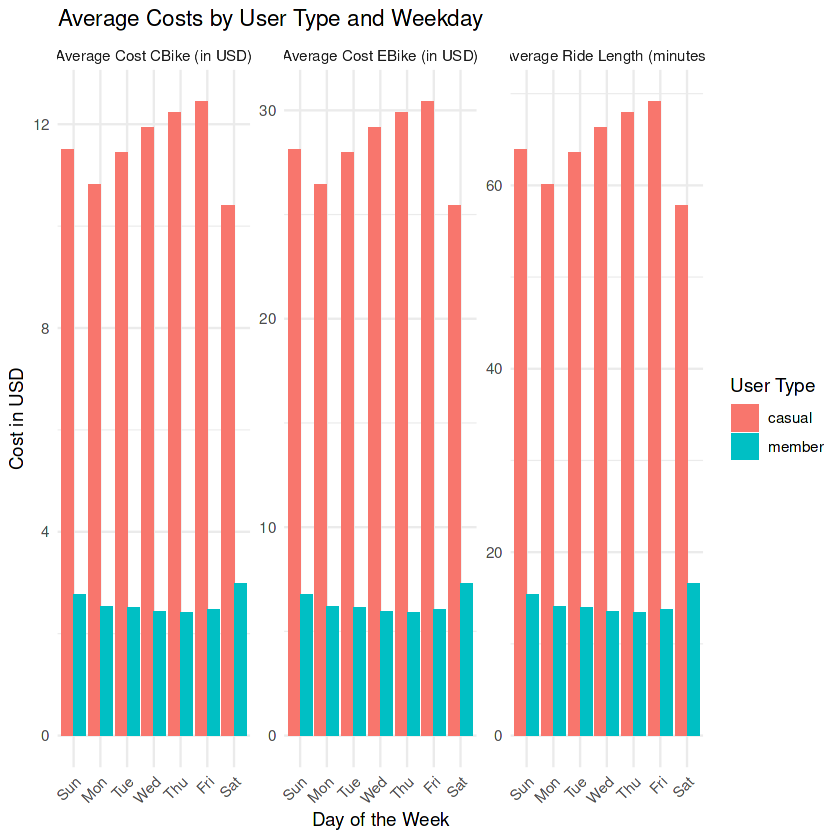

In [25]:
aggreg_data <- all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   # Add weekday column
  group_by(usertype, weekday) %>%   # Group by usertype and weekday
  summarise(
    avg_ride_length = mean(ride_length, na.rm = TRUE),  # Average ride length
    avg_cost_cb = mean(ride_length, na.rm = TRUE) * 0.18,  # Single ride cost
    avg_cost_eb = mean(ride_length, na.rm = TRUE) * 0.44  # Day pass cost
  ) %>% 		 
  arrange(usertype, weekday)

 
# Reshape data for combined plotting
plot_data <- aggreg_data %>%
  pivot_longer(
    cols = starts_with("avg_"),
    names_to = "metric",
    values_to = "value"
  )

# Plot with facets
ggplot(plot_data, aes(x = weekday, y = value, fill = usertype)) +
  geom_col(stat = "identity", position = "dodge") +
  facet_wrap(~ metric, scales = "free", labeller = labeller(
    metric = c(
      avg_ride_length = "Average Ride Length (minutes)",
      avg_cost_cb = "Average Cost CBike (in USD)",
      avg_cost_eb = "Average Cost EBike (in USD)"
    )
  )) +
  labs(
    title = "Average Costs by User Type and Weekday",
    x = "Day of the Week",
    y = "Cost in USD",
    fill = "User Type"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Calculate the costs of rides on classic bikes

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


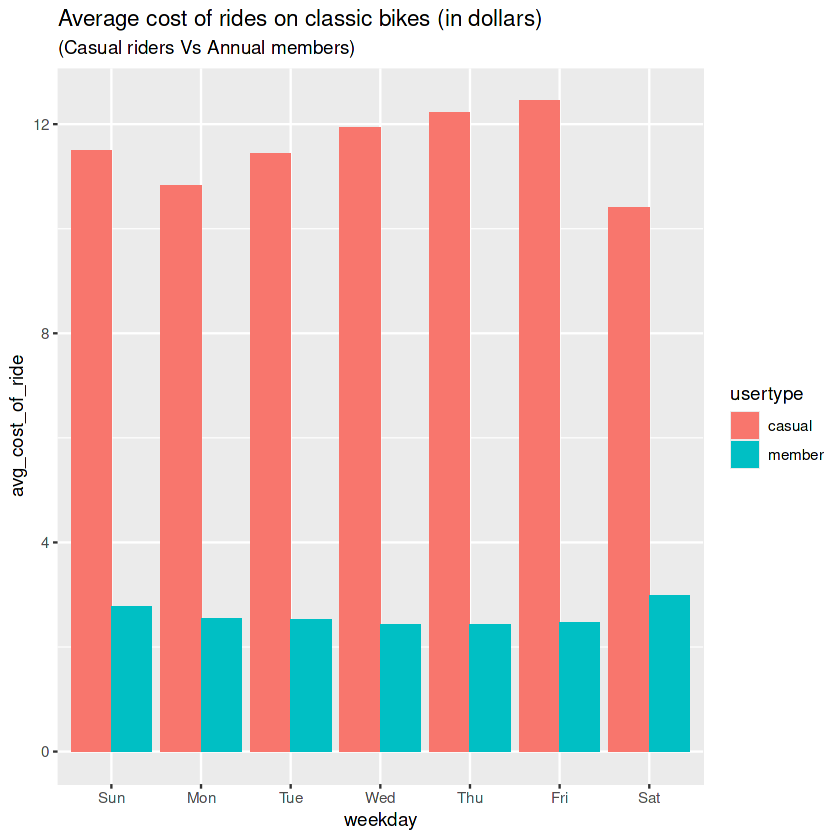

In [26]:
#Single and day pass rides costs in dollars on classic bikes
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   
  group_by(usertype, weekday) %>%   
  summarise(number_of_rides = n()	 
            ,avg_cost_of_ride = mean(ride_length)*0.18) %>% 		 
  arrange(usertype, weekday) %>%
  ggplot(aes(x = weekday, y = avg_cost_of_ride, fill = usertype)) + geom_col(position = "dodge") +
labs(title = "Average cost of rides on classic bikes (in dollars)",
subtitle = "(Casual riders Vs Annual members)")

### Calculate the costs of rides on electric bikes

`summarise()` has grouped output by 'usertype'. You can override using the
`.groups` argument.


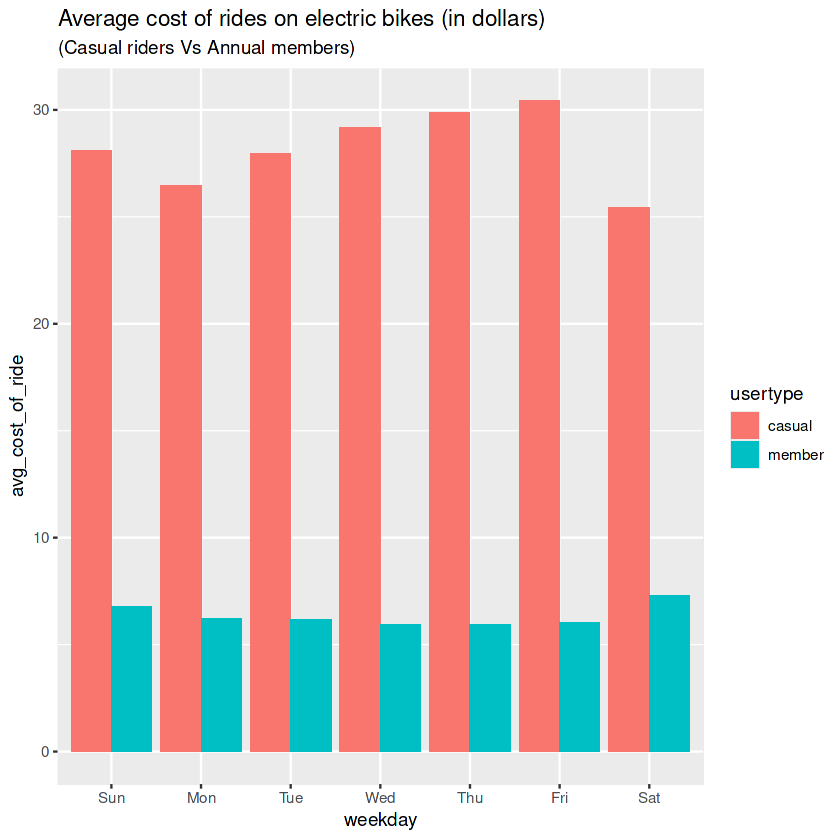

In [27]:
#Single and day pass rides costs in dollars on electric bikes
all_trips_v2 %>% 
  mutate(weekday = wday(start_time, label = TRUE)) %>%   
  group_by(usertype, weekday) %>%   
  summarise(number_of_rides = n()	 
            ,avg_cost_of_ride = mean(ride_length)*0.44) %>% 		 
  arrange(usertype, weekday) %>%
  ggplot(aes(x = weekday, y = avg_cost_of_ride, fill = usertype)) + geom_col(position = "dodge") +
labs(title = "Average cost of rides on electric bikes (in dollars)",
subtitle = "(Casual riders Vs Annual members)")

# RECOMMENDATIONS BASED ON ANALYSIS
1. **Recommendation 1:**

   Single-ride purchase is **USD 1** fee to unlock the bike plus **USD 0.18** per minute for a classic bike and **USD 0.44** for an electric bike.
   Spending **USD 499.2** yearly is costly compared to a **USD 143.9** for an annual membership, so I would recommend casual riders to purchase an annual membership.
   With that, you have 45 minutes free per ride and it is only after exceeding that time limit that you pay additional fee of **USD 0.18 per minute**. They would save **USD 355.3**

2. **Recommendation 2:**

   Day Pass purchase, a casual rider with a minimum average time spent of 61 minutes would spend at least **USD 18.1** over the week, making **USD 72.4** per month and **USD 868.8** yearly, which is still costly compared to the annual membership of **USD 143.9**. therefore, here again, annual membership is the key for casual riders with day pass purchase.

3. **Recommendation 3:**

   Based on the type of bike they have used, electric bikes rides cost them more money than when they rid on classic bikes, so on this basis again it has to do with money saving if they would go with classic bikes. Even if this would stil cost them money as the analysis showed above, it would be more economical than riding on electric bikes. However, the best economical saving they would afford is to go for an annual membership.

## CONCLUSION
Now that the analysis of our data tells us how differently casual riders and annual members use the bikes, a design of a marketing strategy based on the economical aspect of their usage of bikes would be key. Ensure casual riders have a clear idea of how much money they spend weekly, monthly and yearly compared to the cost of an annual membership. As they see the difference, they will likely be convinced to buy that membership.